<font color='darkorange'>
<font size=6> 

**Simulación del Flujo de Rayos Cósmicos usando el clúster LARCAD**

<font color = 'limegreen'>
<font size = 5>
En este notebook se analizan los datos obtenidos de la simulación del flujo de RC usando el programa de CORSIKA en el clúster de LARCAD, esto con el fin de ver cómo cambia el flujo de RC secundarios a medida que subimos en altitud desde el nivel del mar hasta ~ 4500 msnm.

<font color = 'slateblue'>
<font size = 3>
Datos útiles de este proyecto:

- La carpeta principal del proyecto de esta tesis es 'Thes_Flux_NP'. En ella se encuentran todos los datos y el notebook de trabajo.
- Las simulaciones se hicieron a diferentes altitudes sobre el nivel del mar.
- En cada archivo, dentro de la carpeta del proyecto 'Thes_Flux_NP', accediendo a la carpeta 'Data', se encuentran los archivos ordenados desde la menor hasta la mayor altitud. En el nombre del archio se indica la altitud a la que se hizo la simulación.
- En la carpeta 'DataClean' se encuentran los datos usados para hacer las gráficas en Python 3.9.
- Los cálculos se realizaron en el [LARCAD](https://larcad.mx/larcad/index.html), que es el 'Laboratorio Regional de Cómputo de Alto Desempeño'. Cuenta con varios programas preinstalados usados en física de partículas, servidores con procesadores, clúster de cálculo y almacenamiento.

Observación: 
- el programa de CORSIKA se corre en el clúster de LARCAD, los archivos generados en la simulación se analizan usando Python.

<font color = 'deepskyblue'>
<font size = 5>
Librerías

In [181]:
# Importamos las librerías que ocupamos
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import os
import numpy as np

<font color = 'orchid'>
<font size = 5>
Partículas Secundarias vs energía (GeV).<br>
1) Altutud: 7 m.s.n.m.

In [182]:
# Obtenemos las ruta del notebook
current_directory = os.getcwd()
print(current_directory)

/home/zick13/Documentos/Developer/CosmicRay-Thesis/CosmicRay-Thesis/Thes_Flux_NP/Notebook


In [183]:
# Importamos el data set para altitud de 7 msnm.
df_Flux_7m = pd.read_csv('../DataClean/CR_Flux_7m.txt', delimiter = ',')

In [184]:
# Imprimimos las primeras filas del data set para verificar si cargaron exitosamente
df_Flux_7m.head()

,Energy (GeV),Photons,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
0,0.000045,325,0,0,0,0,0,0,0,0,0,0,0,325
1,0.000050,17660,0,0,0,0,0,0,0,0,0,0,0,17660
2,0.000056,20981,0,0,0,0,0,0,0,0,0,0,0,20981
3,0.000063,24016,0,0,0,0,0,0,0,0,0,0,0,24016
4,0.000071,27137,0,0,0,0,0,0,0,0,0,0,0,27137


In [185]:
# Imprimimos las ultimas filas del dataframe para inspeccionar los datos
df_Flux_7m.tail()

,Energy (GeV),Photons,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
146,891.0,0,0,0,3,0,0,0,0,0,0,0,0,3
147,1000.0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,1120.0,0,0,0,0,0,0,0,0,0,0,0,0,0
149,1260.0,0,0,0,0,0,0,0,0,0,0,0,0,0
150,1410.0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [186]:
# Imprimimos las dimensiones del data set (rows, columns)
df_Flux_7m.shape

(151, 14)

In [187]:
# Graficamos los positrones secundarios y su energía a 7 msnm 
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e+'], label = '$e^+$', color = 'chocolate')

# Ajustes del gráfico
# plt.xlabel('Energía [GeV]')
# plt.ylabel('Partículas Secundarias')
# plt.title('Distribución los positrones secundarios a 7 msnm')
# plt.legend()
# plt.grid(True)

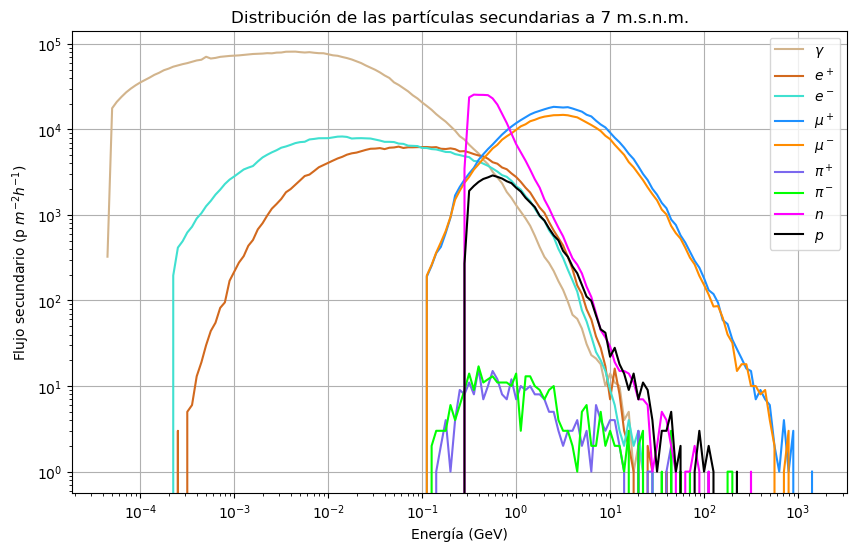

In [188]:
# Gráfica de las partículas secundarias y su energía

# Graficamos todas las partículas en un mismo lienzo usando escala log-log
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias a 7 msnm
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['Photons'], label = '$\gamma$', color = 'tan')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e+'], label = '$e^+$', color = 'chocolate')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e-'], label = '$e^-$', color = 'turquoise')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu+'], label = '$\mu^+$', color = 'dodgerblue')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu-'], label = '$\mu^-$', color = 'darkorange')
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi0'], label = '$\pi^0$', color = 'cyan')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi+'], label = '$\pi^+$', color = 'mediumslateblue')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi-'], label = '$\pi^-$', color = 'lime')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_n'], label = '$n$', color = 'magenta')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_p'], label = '$p$', color = 'black')
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pbar'], label = 'N_pbar', color = 'mediumblue')
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_others'], label = 'Otros', color = 'red')

plt.xlabel('Energía (GeV)')
plt.ylabel('Flujo secundario (p $m^{-2} h^{-1}$)')
plt.title('Distribución de las partículas secundarias a 7 m.s.n.m.')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_7msnm_with_title.png')

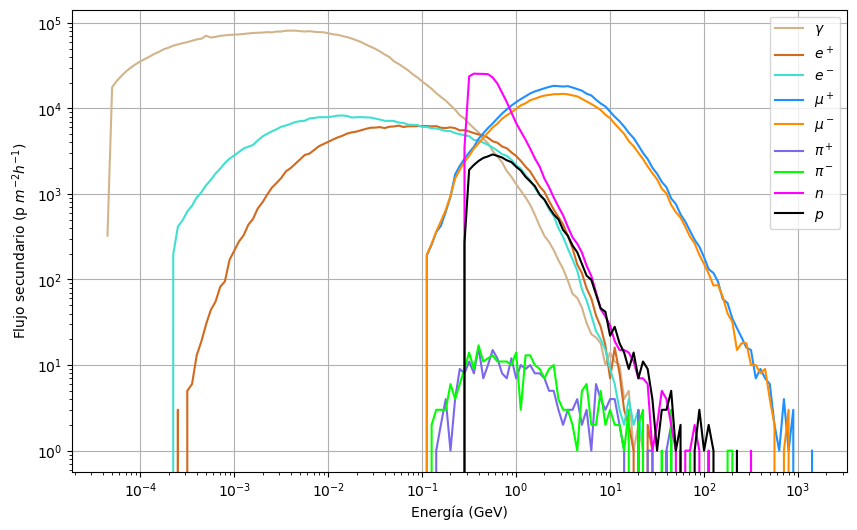

In [189]:
# Gráfica de las partículas secundarias y su energía sin titulo

# Graficamos todas las partículas en un mismo lienzo usando escala log-log
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias a 7 msnm
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['Photons'], label = '$\gamma$', color = 'tan')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e+'], label = '$e^+$', color = 'chocolate')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e-'], label = '$e^-$', color = 'turquoise')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu+'], label = '$\mu^+$', color = 'dodgerblue')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu-'], label = '$\mu^-$', color = 'darkorange')
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi0'], label = '$\pi^0$', color = 'cyan')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi+'], label = '$\pi^+$', color = 'mediumslateblue')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi-'], label = '$\pi^-$', color = 'lime')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_n'], label = '$n$', color = 'magenta')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_p'], label = '$p$', color = 'black')
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pbar'], label = 'N_pbar', color = 'mediumblue')
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_others'], label = 'Otros', color = 'red')

plt.xlabel('Energía (GeV)')
plt.ylabel('Flujo secundario (p $m^{-2} h^{-1}$)')
# plt.title('Distribución de las partículas secundarias a 7 m.s.n.m.')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_7msnm_without_title.png')

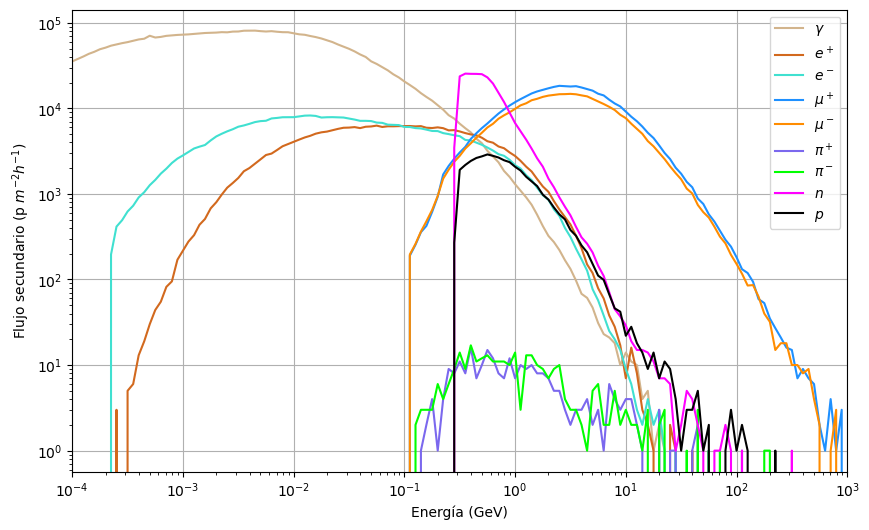

In [190]:
# Gráfica de las partículas secundarias y su energía sin titulo

# Graficamos todas las partículas en un mismo lienzo usando escala log-log
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias a 7 msnm
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['Photons'], label = '$\gamma$', color = 'tan')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e+'], label = '$e^+$', color = 'chocolate')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e-'], label = '$e^-$', color = 'turquoise')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu+'], label = '$\mu^+$', color = 'dodgerblue')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu-'], label = '$\mu^-$', color = 'darkorange')
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi0'], label = '$\pi^0$', color = 'cyan')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi+'], label = '$\pi^+$', color = 'mediumslateblue')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi-'], label = '$\pi^-$', color = 'lime')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_n'], label = '$n$', color = 'magenta')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_p'], label = '$p$', color = 'black')
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pbar'], label = 'N_pbar', color = 'mediumblue')
# plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_others'], label = 'Otros', color = 'red')

# Ajustar los limites del eje x (energia)
plt.xlim(1e-4, 1e3)

plt.xlabel('Energía (GeV)')
plt.ylabel('Flujo secundario (p $m^{-2} h^{-1}$)')
# plt.title('Distribución de las partículas secundarias a 7 m.s.n.m.')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_new_7msnm_without_title.png')

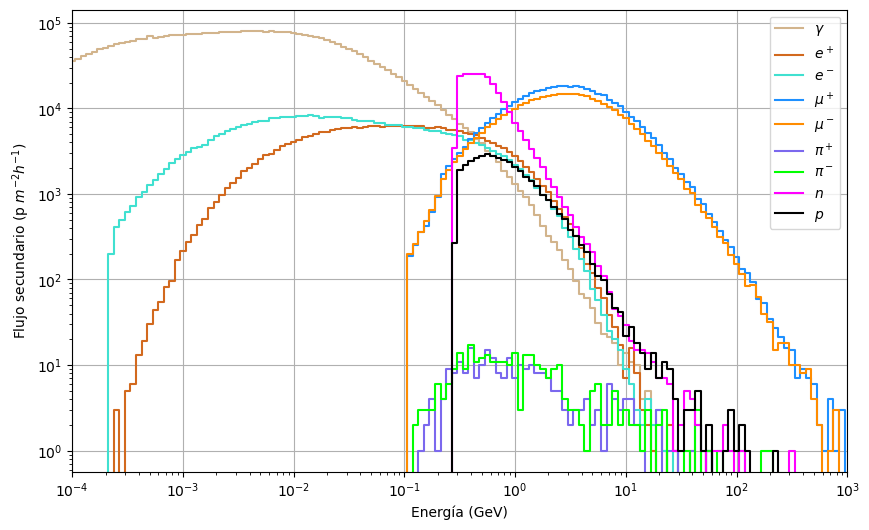

In [191]:
# Graficamos todas las partículas en un mismo lienzo usando escala log-log
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias a 7 msnm
plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['Photons'], where = 'mid', label = '$\gamma$', color = 'tan', linestyle = '-')
plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e+'], where = 'mid', label = '$e^+$', color = 'chocolate', linestyle = '-')
plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e-'], where = 'mid', label = '$e^-$', color = 'turquoise', linestyle = '-')
plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu+'], where = 'mid', label = '$\mu^+$', color = 'dodgerblue', linestyle = '-')
plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu-'], where = 'mid', label = '$\mu^-$', color = 'darkorange', linestyle = '-')
# plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi0'], where = 'mid', label = '$\pi^0$', color = 'cyan', linestyle = '-')
plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi+'], where = 'mid', label = '$\pi^+$', color = 'mediumslateblue', linestyle = '-')
plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi-'], where = 'mid', label = '$\pi^-$', color = 'lime', linestyle = '-')
plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_n'], where = 'mid', label = '$n$', color = 'magenta', linestyle = '-')
plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_p'], where = 'mid', label = '$p$', color = 'black', linestyle = '-')
# plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pbar'], where = 'mid', label = 'N_pbar', color = 'mediumblue', linestyle = '-')
# plt.step(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_others'], where = 'mid', label = 'Otros', color = 'red', linestyle = '-')

# Ajustamos la escala loglog 
plt.xscale('log')
plt.yscale('log')

# Ajustar los limites del eje x
plt.xlim(1e-4, 1e3)

plt.xlabel('Energía (GeV)')
plt.ylabel('Flujo secundario (p $m^{-2} h^{-1}$)')
# plt.title('Distribución de las partículas secundarias a 7 m.s.n.m.')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_new2_7msnm_without_title.png')

<font color = 'orchid'>
<font size = 5>
<font color = 'orchid'>
<font size = 5>
Partículas Secundarias vs energía (GeV).<br>
2) Altitud: 4582.5 m.s.n.m.

In [192]:
# Obtenemos las ruta del notebook
current_directory = os.getcwd()
print(current_directory)

/home/zick13/Documentos/Developer/CosmicRay-Thesis/CosmicRay-Thesis/Thes_Flux_NP/Notebook


In [193]:
# Importamos el data set para altitud de 4582.5 msnm.
df_Flux_4582_5m = pd.read_csv('../DataClean/CR_Flux_4582-5.txt', delimiter = ',')

In [194]:
# Imprimimos las primeras filas del data set para verificar si cargaron exitosamente
df_Flux_4582_5m.head()

,Energy (GeV),Photons,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
0,0.000045,2803,0,0,0,0,0,0,0,0,0,0,0,2803
1,0.000050,151515,0,0,0,0,0,0,0,0,0,0,0,151515
2,0.000056,183361,0,0,0,0,0,0,0,0,0,0,0,183361
3,0.000063,214115,0,0,0,0,0,0,0,0,0,0,0,214115
4,0.000071,244999,0,0,0,0,0,0,0,0,0,0,0,244999


In [195]:
# Imprimimos las ultimas filas del dataframe para inspeccionar los datos
df_Flux_4582_5m.tail()

,Energy (GeV),Photons,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
149,1260.0,0,0,0,0,0,0,0,0,0,0,0,0,0
150,1410.0,0,0,0,0,0,0,0,0,0,0,0,0,0
151,1580.0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,1780.0,0,0,0,0,1,0,0,0,0,1,0,0,2
153,2000.0,0,0,0,1,0,0,0,0,0,1,0,0,2


In [196]:
# Imprimimos las dimensiones del data set (rows, columns)
df_Flux_4582_5m.shape

(154, 14)

In [197]:
# Graficamos los positrones secundarios y su energía a 4582.5 msnm 
# plt.plot(df_Flux_4582_5m['N_e+'], df_Flux_4582_5m['Energy (GeV)'], label = '$e^+$', color = 'chocolate')

# Ajustes del gráfico
# plt.xlabel('Energía [GeV]')
# plt.ylabel('Partículas Secundarias')
# plt.title('Distribución de los positrones secundarios a 4582.5 msnm')
# plt.legend()
# plt.grid(True)

In [198]:
# Graficamos los positrones secundarios y su energía a 4582.5 msnm en escala log-log
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e+'], label = '$e^+$', color = 'chocolate')

# Ajustes del gráfico
# plt.xlabel('Energía [GeV]')
# plt.ylabel('Partículas Secundarias')
# plt.title('Distribución de los positrones secundarios a 4582.5 msnm')
# plt.legend()
# plt.grid(True)

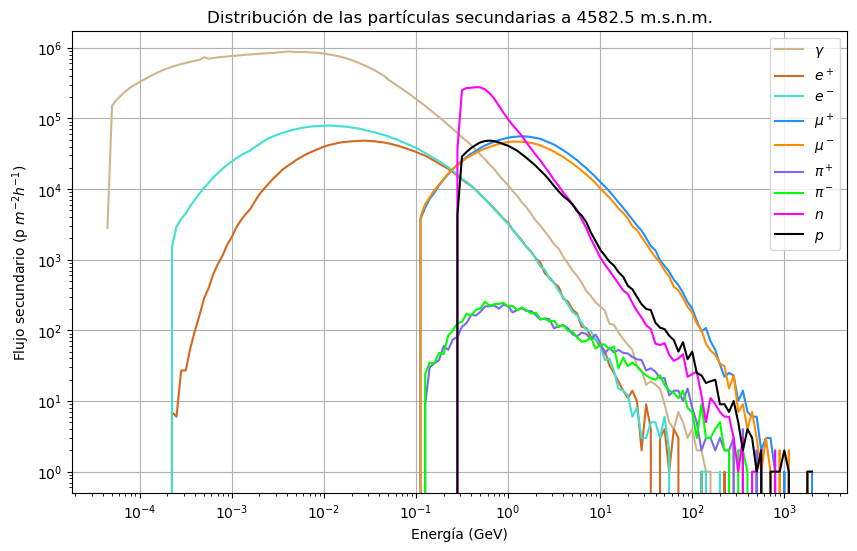

In [199]:
# Gráfica de las partículas secundarias y su energía

# Graficamos todas las partículas en un mismo lienzo usando escala log-log
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias a 4582.5 m.s.n.m.
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['Photons'], label = '$\gamma$', color = 'tan')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e+'], label = '$e^+$', color = 'chocolate')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e-'], label = '$e^-$', color = 'turquoise')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu+'], label = '$\mu^+$', color = 'dodgerblue')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu-'], label = '$\mu^-$', color = 'darkorange')
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi0'], label = '$\pi^0$', color = 'cyan')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi+'], label = '$\pi^+$', color = 'mediumslateblue')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi-'], label = '$\pi^-$', color = 'lime')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_n'], label = '$n$', color = 'magenta')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_p'], label = '$p$', color = 'black')
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pbar'], label = 'N_pbar', color = 'mediumblue')
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_others'], label = 'Otros', color = 'red')

plt.xlabel('Energía (GeV)')
plt.ylabel('Flujo secundario (p $m^{-2} h^{-1}$)')
plt.title('Distribución de las partículas secundarias a 4582.5 m.s.n.m.')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_4600msnm_with_title.png')

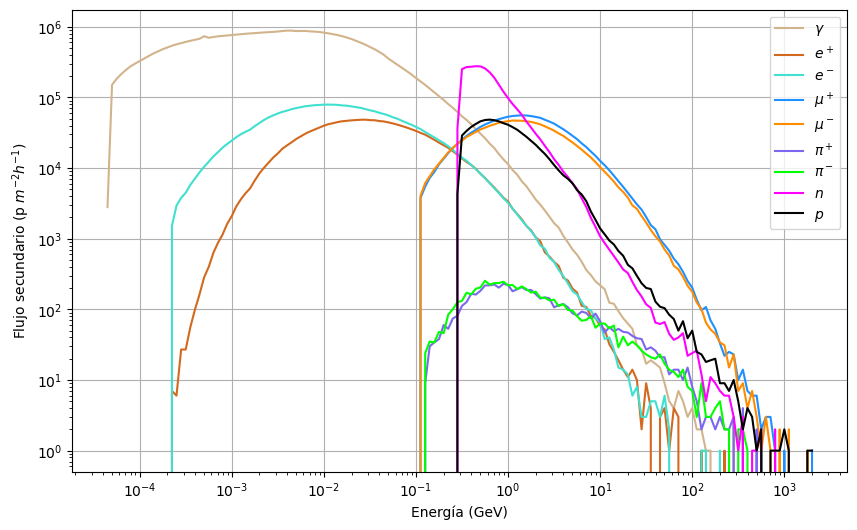

In [200]:
# Gráfica de las partículas secundarias y su energía sin titulo

# Graficamos todas las partículas en un mismo lienzo usando escala log-log sin el titulo
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias a 4582.5 msnm
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['Photons'], label = '$\gamma$', color = 'tan')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e+'], label = '$e^+$', color = 'chocolate')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e-'], label = '$e^-$', color = 'turquoise')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu+'], label = '$\mu^+$', color = 'dodgerblue')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu-'], label = '$\mu^-$', color = 'darkorange')
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi0'], label = '$\pi^0$', color = 'cyan')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi+'], label = '$\pi^+$', color = 'mediumslateblue')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi-'], label = '$\pi^-$', color = 'lime')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_n'], label = '$n$', color = 'magenta')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_p'], label = '$p$', color = 'black')
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pbar'], label = 'N_pbar', color = 'mediumblue')
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_others'], label = 'Otros', color = 'red')

plt.xlabel('Energía (GeV)')
plt.ylabel('Flujo secundario (p $m^{-2} h^{-1}$)')
# plt.title('Distribución de las partículas secundarias a 4582.5 m.s.n.m.')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_4600msnm_without_title.png')

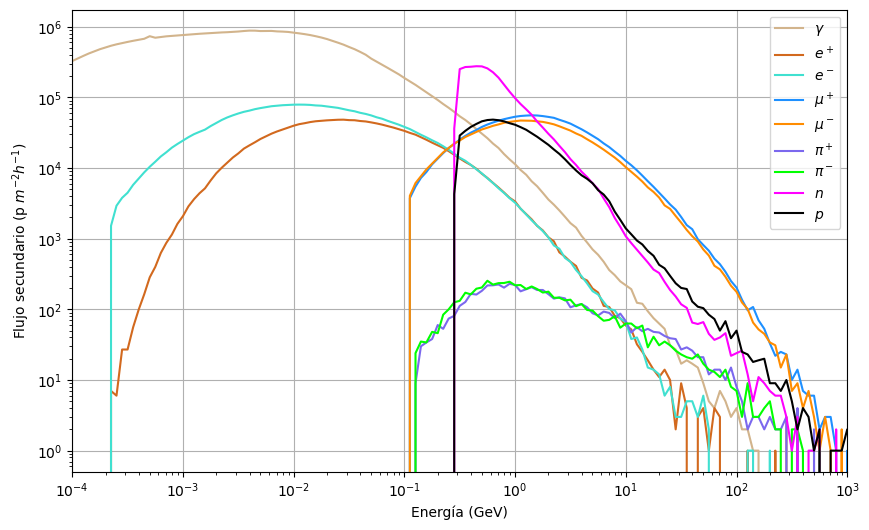

In [201]:
# Gráfica de las partículas secundarias y su energía sin titulo

# Graficamos todas las partículas en un mismo lienzo usando escala log-log sin el titulo
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias a 4582.5 msnm
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['Photons'], label = '$\gamma$', color = 'tan')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e+'], label = '$e^+$', color = 'chocolate')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e-'], label = '$e^-$', color = 'turquoise')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu+'], label = '$\mu^+$', color = 'dodgerblue')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu-'], label = '$\mu^-$', color = 'darkorange')
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi0'], label = '$\pi^0$', color = 'cyan')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi+'], label = '$\pi^+$', color = 'mediumslateblue')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi-'], label = '$\pi^-$', color = 'lime')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_n'], label = '$n$', color = 'magenta')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_p'], label = '$p$', color = 'black')
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pbar'], label = 'N_pbar', color = 'mediumblue')
# plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_others'], label = 'Otros', color = 'red')

# Ajustar los limites del eje x
plt.xlim(1e-4, 1e3)

plt.xlabel('Energía (GeV)')
plt.ylabel('Flujo secundario (p $m^{-2} h^{-1}$)')
# plt.title('Distribución de las partículas secundarias a 4582.5 m.s.n.m.')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_new_4600msnm_without_title.png')

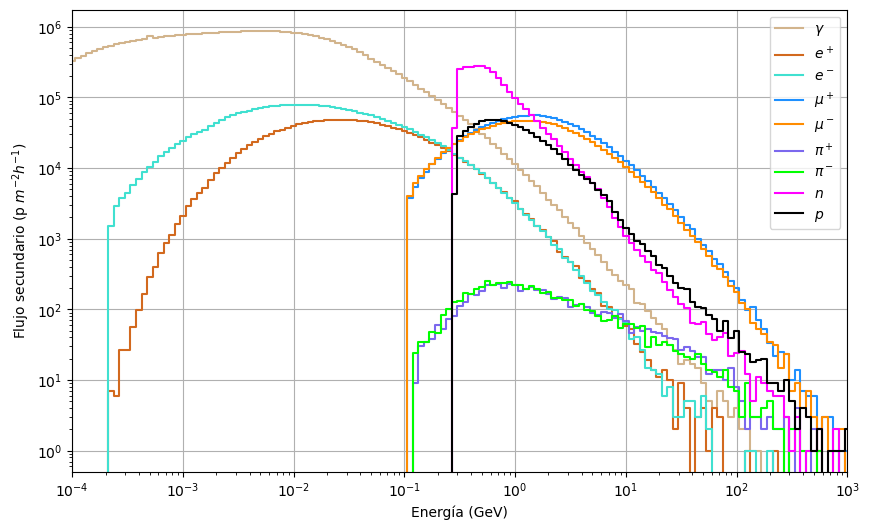

In [202]:
# Gráfica de las partículas secundarias y su energía sin titulo

# Graficamos todas las partículas en un mismo lienzo usando escala log-log sin el titulo
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias a 4582.5 msnm
plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['Photons'], where = 'mid', label = '$\gamma$', color = 'tan', linestyle = '-')
plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e+'], where = 'mid', label = '$e^+$', color = 'chocolate', linestyle = '-')
plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e-'], where = 'mid',label = '$e^-$', color = 'turquoise', linestyle = '-')
plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu+'], where = 'mid',label = '$\mu^+$', color = 'dodgerblue', linestyle = '-')
plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu-'], where = 'mid',label = '$\mu^-$', color = 'darkorange', linestyle = '-')
# plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi0'], where = 'mid',label = '$\pi^0$', color = 'cyan', linestyle = '-')
plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi+'], where = 'mid',label = '$\pi^+$', color = 'mediumslateblue', linestyle = '-')
plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi-'], where = 'mid',label = '$\pi^-$', color = 'lime', linestyle = '-')
plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_n'], where = 'mid',label = '$n$', color = 'magenta', linestyle = '-')
plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_p'], where = 'mid',label = '$p$', color = 'black', linestyle = '-')
# plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pbar'], where = 'mid',label = 'N_pbar', color = 'mediumblue', linestyle = '-')
# plt.step(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_others'], where = 'mid',label = 'Otros', color = 'red', linestyle = '-')

# Ajustamos la escala loglog 
plt.xscale('log')
plt.yscale('log')

# Ajustar los limites del eje x
plt.xlim(1e-4, 1e3)

plt.xlabel('Energía (GeV)')
plt.ylabel('Flujo secundario (p $m^{-2} h^{-1}$)')
# plt.title('Distribución de las partículas secundarias a 4582.5 m.s.n.m.')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_new2_4600msnm_without_title.png')

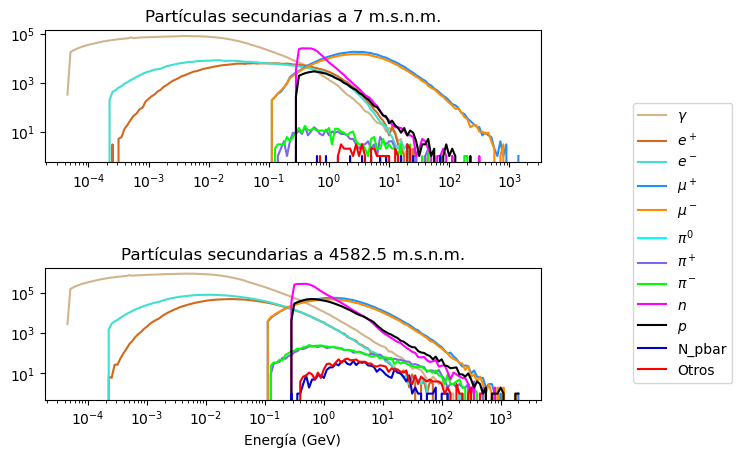

In [203]:
## Arreglar porque no me gusta como se ven las graficas

# Definimos el subplot para que tenga 3 rows y 1 column
plt.subplot(2, 1, 1)

# Distribución de las partículas secundarias a 7 m.s.n.m.
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['Photons'], label = '$\gamma$', color = 'tan')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e+'], label = '$e^+$', color = 'chocolate')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_e-'], label = '$e^-$', color = 'turquoise')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu+'], label = '$\mu^+$', color = 'dodgerblue')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_mu-'], label = '$\mu^-$', color = 'darkorange')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi0'], label = '$\pi^0$', color = 'cyan')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi+'], label = '$\pi^+$', color = 'mediumslateblue')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pi-'], label = '$\pi^-$', color = 'lime')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_n'], label = '$n$', color = 'magenta')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_p'], label = '$p$', color = 'black')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_pbar'], label = 'N_pbar', color = 'mediumblue')
plt.loglog(df_Flux_7m['Energy (GeV)'], df_Flux_7m['N_others'], label = 'Otros', color = 'red')

# plt.xlabel('Energía (GeV)')
# plt.ylabel('Partículas Secundarias', rotation = 90, labelpad = 20)
plt.title('Partículas secundarias a 7 m.s.n.m.')
#plt.legend(loc = 'upper right', bbox_to_anchor = (1.5, 3.3)) # bbox_to_anchor nos sirve para ajustar el legend usando coordenadas

plt.subplot(2, 1, 2)

# Distribución de las partículas secundarias a 4582.5 m.s.n.m.
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['Photons'], label = '$\gamma$', color = 'tan')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e+'], label = '$e^+$', color = 'chocolate')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_e-'], label = '$e^-$', color = 'turquoise')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu+'], label = '$\mu^+$', color = 'dodgerblue')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_mu-'], label = '$\mu^-$', color = 'darkorange')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi0'], label = '$\pi^0$', color = 'cyan')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi+'], label = '$\pi^+$', color = 'mediumslateblue')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pi-'], label = '$\pi^-$', color = 'lime')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_n'], label = '$n$', color = 'magenta')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_p'], label = '$p$', color = 'black')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_pbar'], label = 'N_pbar', color = 'mediumblue')
plt.loglog(df_Flux_4582_5m['Energy (GeV)'], df_Flux_4582_5m['N_others'], label = 'Otros', color = 'red')

plt.xlabel('Energía (GeV)')
# plt.ylabel('Partículas Secundarias')
plt.title('Partículas secundarias a 4582.5 m.s.n.m.')

plt.legend(loc = 'upper right', bbox_to_anchor = (1.4, 2.3)) # bbox_to_anchor nos sirve para ajustar el legend usando coordenadas


# Ajustar para evitar superposiciones
# plt.tight_layout()

# Agregamos un titulo al subplot
# plt.suptitle('Distribución de las partículas secundarias producidas durante 1 hr de flujo')

# Ajustar espaciado vertical
plt.subplots_adjust(hspace = 0.8)

# Mostrar la grafica
plt.show()

<font color = 'orchid'>
<font size = 5>
Altitud vs # protones<br>
Altitud vs # neutrones

In [204]:
# Obtenemos las ruta del notebook
current_directory = os.getcwd()
print(current_directory)

/home/zick13/Documentos/Developer/CosmicRay-Thesis/CosmicRay-Thesis/Thes_Flux_NP/Notebook


In [205]:
# Importamos el data set que contiene el # de protones y # neutrones en cada altitud
df_Flux_altitud_prot_neut = pd.read_csv('../DataClean/CR_Flux_All.txt', delimiter = ',')

In [206]:
# Imprimimos las primeras filas del data set para verificar si cargaron exitosamente
df_Flux_altitud_prot_neut.head()

,Altitud (msnm),Neutrones,Protones
0,7.0,237945,38964
1,108.0,257486,42976
2,199.0,274748,45946
3,303.0,290636,49437
4,401.5,312755,53498


In [207]:
# Imprimimos las ultimas filas del dataframe para inspeccionar los datos
df_Flux_altitud_prot_neut.tail()

,Altitud (msnm),Neutrones,Protones
36,4290.5,2570422,658890
37,4395.5,2674167,690797
38,4492.0,2776633,725149
39,4539.0,2828116,741552
40,4582.5,2878449,758788


In [208]:
# Imprimimos las dimensiones del data set (rows, columns)
df_Flux_altitud_prot_neut.shape

(41, 3)

In [209]:
# Graficamos ambas las partículas en un mismo lienzo usando escala log-log
# plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias 
# plt.plot(df_Flux_altitud_prot_neut['Neutrones'], df_Flux_altitud_prot_neut['Altitud (msnm)'], label = '$n$', color = 'magenta')
# plt.plot(df_Flux_altitud_prot_neut['Protones'], df_Flux_altitud_prot_neut['Altitud (msnm)'], label = '$p$', color = 'black')

# plt.xlabel('Partículas Secundarias')
# plt.ylabel('Altitud (m.s.n.m)')
# plt.title('Distribución de las partículas secundarias')
# plt.legend()
# plt.grid(True)

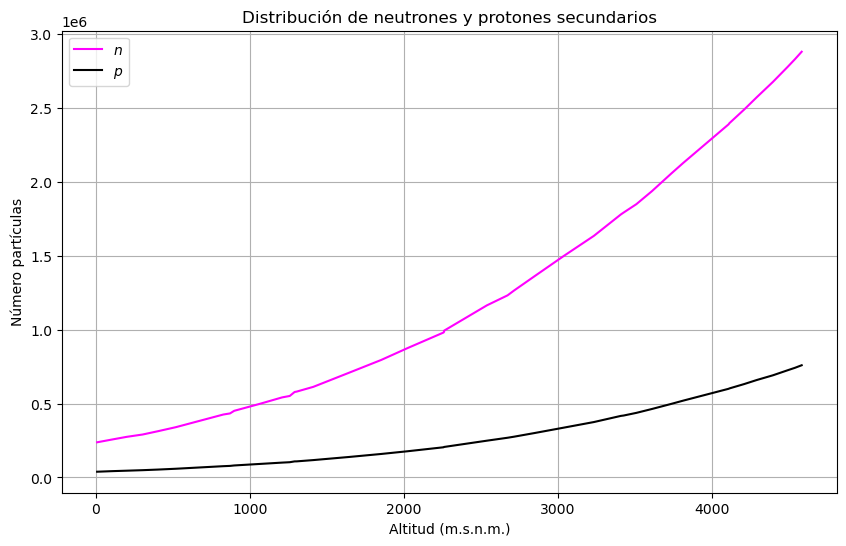

In [210]:
# Graficamos ambas partículas en un mismo lienzo
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias 
plt.plot(df_Flux_altitud_prot_neut['Altitud (msnm)'], df_Flux_altitud_prot_neut['Neutrones'], label = '$n$', color = 'magenta')
plt.plot(df_Flux_altitud_prot_neut['Altitud (msnm)'] ,df_Flux_altitud_prot_neut['Protones'], label = '$p$', color = 'black')

plt.xlabel('Altitud (m.s.n.m.)')
plt.ylabel('Número partículas')
plt.title('Distribución de neutrones y protones secundarios')
plt.legend()
plt.grid(True)

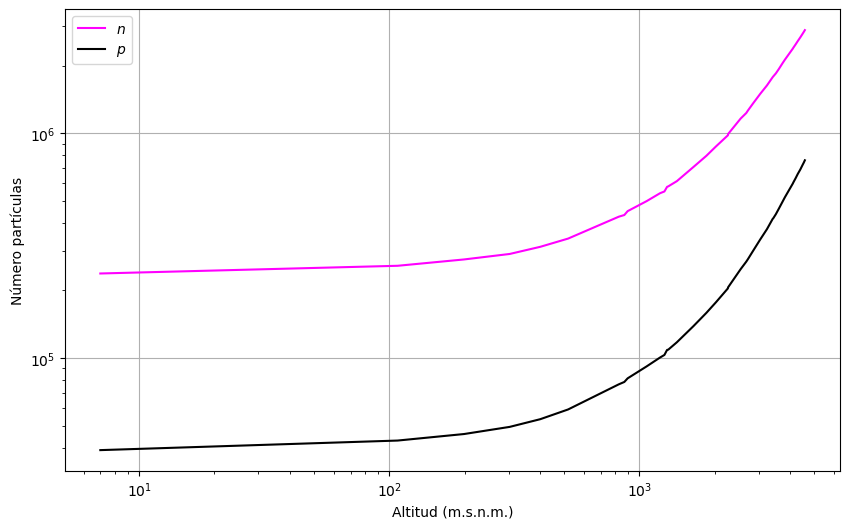

In [211]:
# Graficamos ambas partículas en un mismo lienzo usando escala log-log
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias 
plt.loglog(df_Flux_altitud_prot_neut['Altitud (msnm)'], df_Flux_altitud_prot_neut['Neutrones'], label = '$n$', color = 'magenta')
plt.loglog(df_Flux_altitud_prot_neut['Altitud (msnm)'] ,df_Flux_altitud_prot_neut['Protones'], label = '$p$', color = 'black')

plt.xlabel('Altitud (m.s.n.m.)')
plt.ylabel('Número partículas')
# plt.title('Distribución de las partículas secundarias')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_protons_and_neutrons.png')

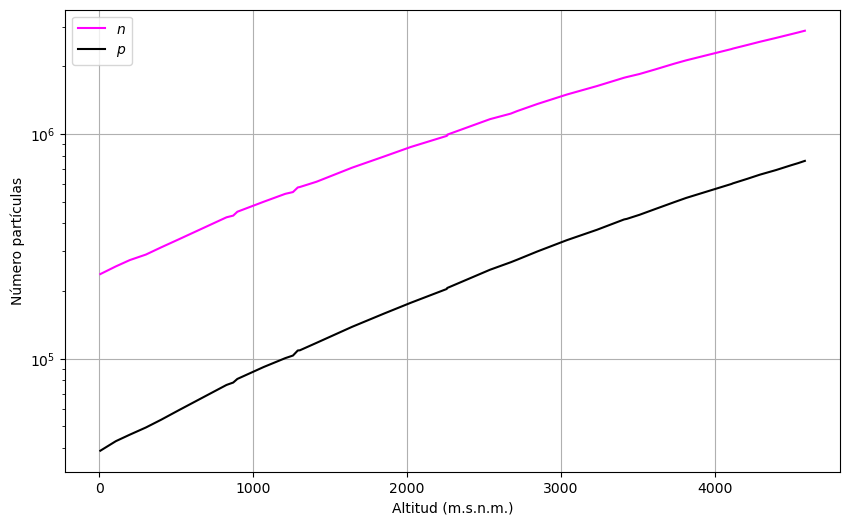

In [212]:
# Graficamos ambas partículas en un mismo lienzo usando escala log-log
plt.figure(figsize = (10, 6)) # creamos un lienzo

# Distribución de las partículas secundarias 
plt.plot(df_Flux_altitud_prot_neut['Altitud (msnm)'], df_Flux_altitud_prot_neut['Neutrones'], label = '$n$', color = 'magenta')
plt.plot(df_Flux_altitud_prot_neut['Altitud (msnm)'] ,df_Flux_altitud_prot_neut['Protones'], label = '$p$', color = 'black')

# Ajustamos la escala loglog 
plt.yscale('log')

plt.xlabel('Altitud (m.s.n.m.)')
plt.ylabel('Número partículas')
# plt.title('Distribución de las partículas secundarias')
plt.legend()
plt.grid(True)
plt.savefig('Thesis_flux_new_protons_and_neutrons.png')